<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [3]:
import csv
from collections import namedtuple   # Convenient to store the data rows

DATA_FILE = 'data/chipotle.tsv'

In [35]:
import pandas as pd

df = pd.read_csv(DATA_FILE,sep='\t')
file_nested_list = df
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [36]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [42]:
df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [10]:
df['item_price'] = df['item_price'].str.replace('$','')
df['float_items'] = df['item_price'].astype('float64')*df['quantity']
all_orders = df.groupby('order_id')['float_items'].sum()
all_orders.mean()

21.394231188658654

In [33]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price,float_items,burrito_toppings
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,NaN
1,1,1,Izze,[Clementine],3.39,3.39,NaN
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,NaN
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,NaN
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96,NaN
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98,NaN
6,3,1,Side of Chips,NaN,1.69,1.69,NaN
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75,"[Tomatillo Red Chili Salsa, [Fajita Vegetables..."
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,9.25,NaN
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto..."


18.81142857142869

### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [11]:
item_list = df['item_name'].unique().tolist()
drink_list = [i for i in item_list if 'soda' in i.lower() or 'soft drink' in i.lower()]
drink_list

['Canned Soda', 'Canned Soft Drink', '6 Pack Soft Drink']

['Canned Soda', 'Canned Soft Drink', '6 Pack Soft Drink']

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [14]:
burrito_types = [i for i in item_list if 'burrito' in i.lower()]

df['burrito_toppings'] = df[df['item_name'].isin(burrito_types)]['choice_description']
topping_list = df['burrito_toppings'].dropna().tolist() 


In [15]:
average_toppings = sum([(i.count(',') + 1) for i in topping_list]) / len(topping_list)

In [115]:
average_toppings

5.395051194539249

In [44]:
topping_list

['[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]',
 '[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]',
 '[Tomatillo-Green Chili Salsa (Medium), [Pinto Beans, Cheese, Sour Cream]]',
 '[Fresh Tomato Salsa (Mild), [Black Beans, Rice, Cheese, Sour Cream, Lettuce]]',
 '[[Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Salsa (Medium), Tomatillo-Red Chili Salsa (Hot)], [Rice, Cheese, Sour Cream, Lettuce]]',
 '[[Tomatillo-Green Chili Salsa (Medium), Tomatillo-Red Chili Salsa (Hot)], [Pinto Beans, Rice, Cheese, Sour Cream, Guacamole, Lettuce]]',
 '[[Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, Sour Cream, Lettuce]]',
 '[Tomatillo-Green Chili Salsa (Medium), [Pinto Beans, Rice, Cheese, Sour Cream]]',
 '[[Roasted Chili Corn Salsa (Medium), Fresh Tomato Salsa (Mild)], [Rice, Black Beans, Sour Cream]]',
 '[Fresh Tomato Salsa, [Rice, Pinto Beans, C

### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [16]:
chip_orders = [i for i in item_list if 'chips' in i.lower()]

In [17]:
chip_dict = df[df['item_name'].isin(chip_orders)].groupby('item_name')['quantity'].sum().to_dict()

In [18]:
chip_dict

{'Chips': 230,
 'Chips and Fresh Tomato Salsa': 130,
 'Chips and Guacamole': 506,
 'Chips and Mild Fresh Tomato Salsa': 1,
 'Chips and Roasted Chili Corn Salsa': 23,
 'Chips and Roasted Chili-Corn Salsa': 18,
 'Chips and Tomatillo Green Chili Salsa': 45,
 'Chips and Tomatillo Red Chili Salsa': 50,
 'Chips and Tomatillo-Green Chili Salsa': 33,
 'Chips and Tomatillo-Red Chili Salsa': 25,
 'Side of Chips': 110}

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


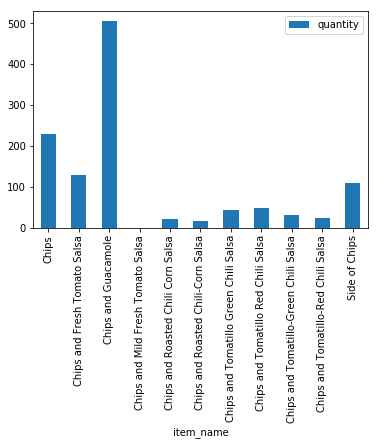

In [19]:
import matplotlib.pyplot as plt
grouped_items = df[df['item_name'].isin(chip_orders)].groupby('item_name')['quantity'].sum().to_frame()
grouped_items.plot.bar()

In [43]:
all_orders

order_id
1       11.56
2       33.96
3       12.67
4       21.00
5       13.70
6       17.50
7       15.70
8       10.88
9       12.85
10      13.20
11      12.38
12      14.37
13      10.88
14      10.08
15      10.88
16      10.68
17      10.08
18      24.90
19      13.90
20      36.20
21      23.36
22      12.98
23      13.35
24      12.07
25      11.38
26      20.50
27      13.90
28      33.70
29      17.98
30      23.36
        ...  
1805    20.00
1806    13.00
1807    18.64
1808    13.70
1809    14.45
1810    23.00
1811    29.25
1812    25.00
1813    35.00
1814    13.70
1815    12.50
1816    13.20
1817    13.00
1818    18.14
1819    13.20
1820    12.50
1821    13.70
1822    26.00
1823    12.15
1824    26.95
1825    66.50
1826    15.95
1827    32.95
1828    14.45
1829    24.25
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: float_items, Length: 1834, dtype: float64

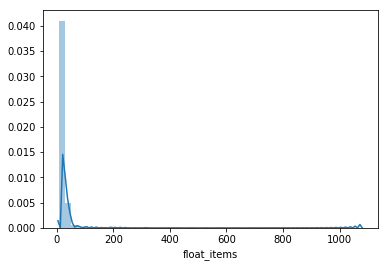

In [41]:
import seaborn as sns
sns.distplot(all_orders)


In [21]:
all_orders.describe()

count    1834.000000
mean       21.394231
std        30.216891
min        10.080000
25%        12.670000
50%        16.650000
75%        22.960000
max      1074.240000
Name: float_items, dtype: float64